In [2]:
# load pandas package to read csv
from pandas import read_csv

# locate the local CSV file
filepath = "candidates.csv"

# read using pandas
csv_df = read_csv(filepath_or_buffer=filepath,sep=";")

# print
csv_df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [3]:
# Store the data into a SQL database
import sqlite3 as database

# Create a local connection
con = database.connect(database="hires.db")

# Upload the dataframe as a table in the local database
csv_df.to_sql(name="employee", con=con, if_exists="replace")

50000

In [6]:
# Read the SQL from the local database
from pandas import read_sql

query = """
SELECT
    *,
    CASE WHEN `Code Challenge Score` >= 7 AND `Technical Interview Score` >= 7 THEN TRUE ELSE FALSE END AS Hired,
    CAST(`Application Date` as DATE) AS `Application Year`
FROM employee
"""

df = read_sql(con=con, sql=query)

df.head()

,index,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,Hired,Application Year
0,0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0,2021
1,1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0,2021
2,2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1,2020
3,3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0,2020
4,4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1,2020


<Axes: ylabel='Email'>

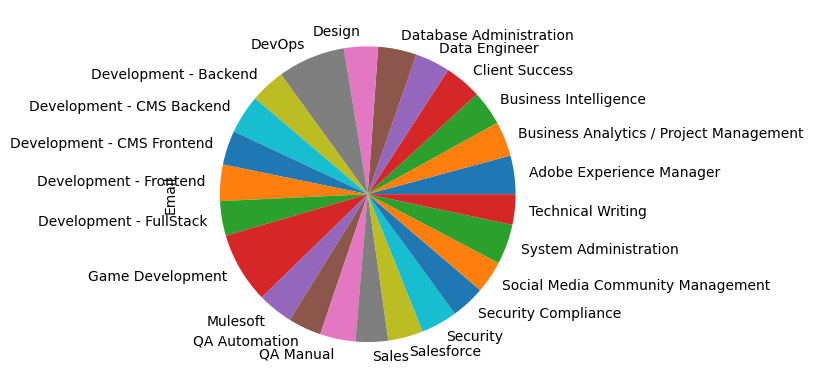

In [12]:
# Hires by technology

logic = (df['Hired'])==1
by = "Technology"
id_col = "Email"

grouped = df.loc[logic].groupby(by=by).count()[id_col]

grouped.plot.pie()

<Axes: ylabel='Application Year'>

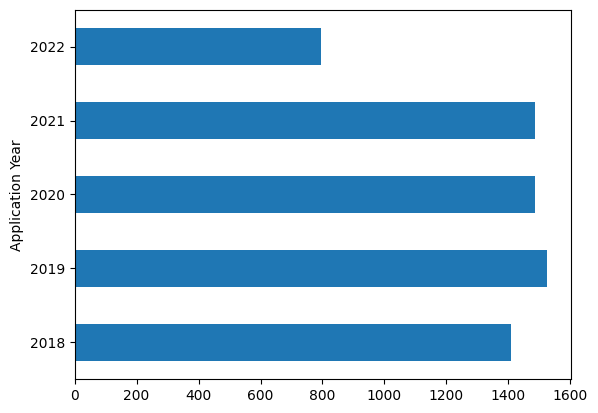

In [13]:
# Hires by year (horizontal bar chart)

logic = (df['Hired'])==1
by = "Application Year"
id_col = "Email"

grouped = df.loc[logic].groupby(by=by).count()[id_col]

grouped.plot.barh(y='Application Year')

<Axes: xlabel='Seniority'>

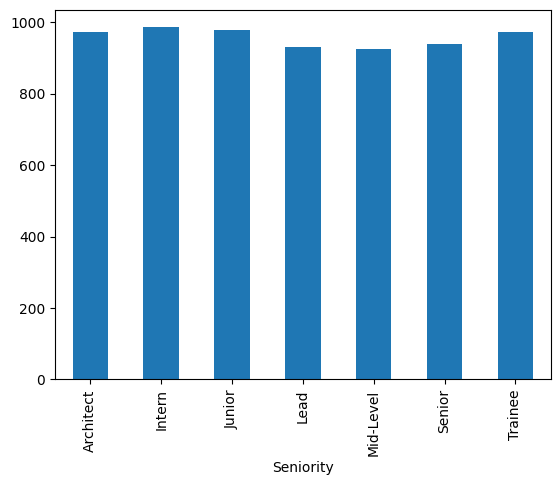

In [15]:
# Hires by seniority (bar chart)

logic = (df['Hired'])==1
by = "Seniority"
id_col = "Email"

grouped = df.loc[logic].groupby(by=by).count()[id_col]

grouped.plot.bar(y='Application Year')

In [25]:
# Hires by country over years (USA, Brazil, Colombia, and Ecuador only)(multiline chart)

logic = ((df['Hired'])==1) & (df['Country'].isin(['USA', 'Colombia', 'Ecuador', 'Brazil']))
by = "Application Year"
by_2 = "Country"
id_col = "Email"

grouped = df.loc[logic].groupby(by=[by, by_2]).count()[id_col]

grouped = grouped.reset_index()

grouped.head()

import seaborn

seaborn.lineplot(data=df, x="Application Year", y="Email", hue="Country")